In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/final/RTE3/DEV_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/RTE3/DEV_'+str(i+1)+'.csv.pickle')
        train=pd.concat([train,temp])

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_m,list_T,list_relaciones,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000000,2.166,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,40,,bai...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.000000,0.000000,0.000000,0.000000,YES
1,0.000000,0.000000,1.970,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,39,"pay{pay,VERB} - related_to - cost{cost,VERB} |",yug...,"Empty DataFrame Columns: [] Index: [the{the,DE...",0.600000,0.500000,0.333333,0.000000,NO
2,0.000000,0.000000,2.754,0.000,0.000000,0.000000,0.000000,1.000000,1,0,...,0,45,"production{production,NOUN} - derived_from - p...","does{do,AUX} ...",Empty DataFrame Columns: [] Index: [loraine{lo...,0.333333,0.125000,0.000000,0.000000,UNKNOWN
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,60,,"the{the,DET} extr...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.500000,0.200000,0.000000,0.000000,YES
4,-0.442936,146.821869,2.735,1.473,4.089147,0.002735,0.231184,-0.106360,0,0,...,1,22,,"30{30,NUM} die{die...","die{die,VERB} a{a,D...",0.428571,0.166667,0.000000,0.045455,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,156.604034,2.763,2.643,4.006609,0.002715,0.576517,0.268804,0,0,...,1,25,,"haque{haque,...","wants{want,V...",0.285714,0.166667,0.000000,0.040000,UNKNOWN
796,0.000000,0.000000,2.651,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,35,,"the{the,DET} ...",Empty DataFrame Columns: [] Index: [iscor{isco...,0.545455,0.200000,0.000000,0.000000,YES
797,0.000000,0.000000,2.702,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,29,,"the{the,DET...",Empty DataFrame Columns: [] Index: [critics{cr...,0.428571,0.333333,0.200000,0.000000,UNKNOWN
798,0.000000,0.000000,2.783,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,31,,"tyler{tyler,PR...","Empty DataFrame Columns: [] Index: [two{two,NU...",0.428571,0.000000,0.000000,0.000000,NO


<Axes: title={'center': 'list_cuatrigram'}, xlabel='clases'>

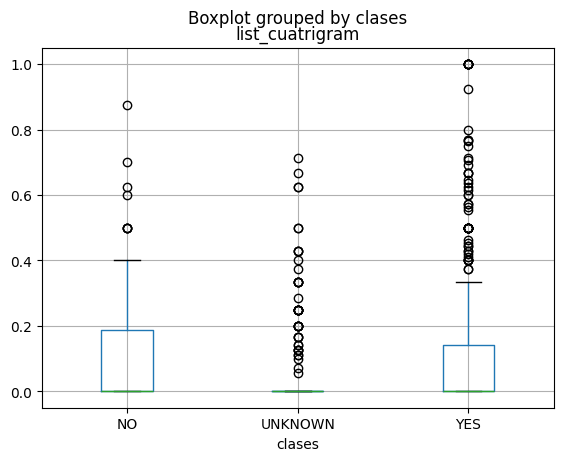

In [4]:
train.boxplot(by="clases",column="list_cuatrigram")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["list_relaciones","listas_malignf","listas_malign"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000000,2.166,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,5,0,40,0.000000,0.000000,0.000000,0.000000,YES
1,0.000000,0.000000,1.970,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,6,0,39,0.600000,0.500000,0.333333,0.000000,NO
2,0.000000,0.000000,2.754,0.000,0.000000,0.000000,0.000000,1.000000,1,0,0,10,0,45,0.333333,0.125000,0.000000,0.000000,UNKNOWN
3,0.000000,0.000000,2.730,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,7,0,60,0.500000,0.200000,0.000000,0.000000,YES
4,-0.442936,146.821869,2.735,1.473,4.089147,0.002735,0.231184,-0.106360,0,0,0,8,1,22,0.428571,0.166667,0.000000,0.045455,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,156.604034,2.763,2.643,4.006609,0.002715,0.576517,0.268804,0,0,0,8,1,25,0.285714,0.166667,0.000000,0.040000,UNKNOWN
796,0.000000,0.000000,2.651,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,12,0,35,0.545455,0.200000,0.000000,0.000000,YES
797,0.000000,0.000000,2.702,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,29,0.428571,0.333333,0.200000,0.000000,UNKNOWN
798,0.000000,0.000000,2.783,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,8,0,31,0.428571,0.000000,0.000000,0.000000,NO


In [6]:
train=train.drop(["entropia_total","max_info","similitud_faltantes","distancias","list_trigram"],axis=1)

In [7]:
#train["Shape Origin"] = train["Shape Origin"] / train["Total T"]
#train["Shape Finish"] = train["Shape Finish"] / train["Total T"]

In [8]:
#train=train.drop(["Total T"],axis=1)

In [9]:
train

,sumas,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000,0.000000,0.000000,0,0,0,5,0,40,0.000000,0.000000,0.000000,YES
1,0.000000,0.000,0.000000,0.000000,0,0,1,6,0,39,0.600000,0.333333,0.000000,NO
2,0.000000,0.000,0.000000,0.000000,1,0,0,10,0,45,0.333333,0.000000,0.000000,UNKNOWN
3,0.000000,0.000,0.000000,0.000000,0,0,0,7,0,60,0.500000,0.000000,0.000000,YES
4,-0.442936,1.473,4.089147,0.002735,0,0,0,8,1,22,0.428571,0.000000,0.045455,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,4.449538,2.643,4.006609,0.002715,0,0,0,8,1,25,0.285714,0.000000,0.040000,UNKNOWN
796,0.000000,0.000,0.000000,0.000000,0,0,0,12,0,35,0.545455,0.000000,0.000000,YES
797,0.000000,0.000,0.000000,0.000000,0,0,0,8,0,29,0.428571,0.200000,0.000000,UNKNOWN
798,0.000000,0.000,0.000000,0.000000,0,0,0,8,0,31,0.428571,0.000000,0.000000,NO


In [10]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [11]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [12]:
train_m

,sumas,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_cuatrigram,diferencias
sumas,1.000000,0.746686,0.720436,0.306145,-0.014780,-0.004871,0.082900,0.077333,0.453463,0.328699,-0.265310,-0.211934,0.210736
entropias,0.746686,1.000000,0.978333,0.451925,-0.007750,0.011145,0.073514,0.068183,0.622479,-0.062680,-0.389385,-0.312711,0.521828
mutinf,0.720436,0.978333,1.000000,0.452224,-0.009199,-0.003315,0.061027,0.044508,0.580690,-0.065187,-0.375464,-0.315901,0.486860
mearts,0.306145,0.451925,0.452224,1.000000,-0.015183,-0.006314,0.008353,0.005570,0.324456,-0.099889,-0.197727,-0.186779,0.305551
list_comp,-0.014780,-0.007750,-0.009199,-0.015183,1.000000,0.058425,0.004734,0.143621,0.087567,-0.036894,-0.155362,-0.083209,0.107553
list_incomp,-0.004871,0.011145,-0.003315,-0.006314,0.058425,1.000000,-0.033997,0.103536,0.132914,-0.018365,-0.135094,-0.093311,0.140619
list_rel_con,0.082900,0.073514,0.061027,0.008353,0.004734,-0.033997,1.000000,0.094803,0.171137,-0.075359,-0.233571,-0.125265,0.146197
list_M,0.077333,0.068183,0.044508,0.005570,0.143621,0.103536,0.094803,1.000000,0.405405,0.058778,0.157226,0.256286,0.329422
list_m,0.453463,0.622479,0.580690,0.324456,0.087567,0.132914,0.171137,0.405405,1.000000,-0.059644,-0.405577,-0.237797,0.857352
list_T,0.328699,-0.062680,-0.065187,-0.099889,-0.036894,-0.018365,-0.075359,0.058778,-0.059644,1.000000,0.087569,0.028088,-0.319504


<Axes: >

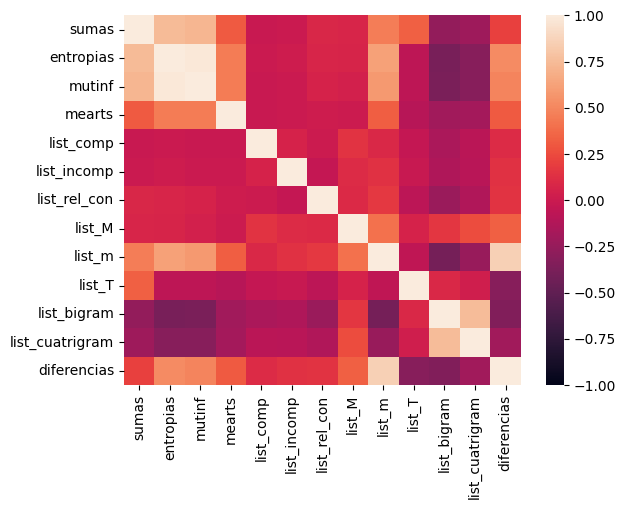

In [13]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [14]:
train_m

,sumas,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_cuatrigram,diferencias
sumas,1.000000,0.746686,0.720436,0.306145,-0.014780,-0.004871,0.082900,0.077333,0.453463,0.328699,-0.265310,-0.211934,0.210736
entropias,0.746686,1.000000,0.978333,0.451925,-0.007750,0.011145,0.073514,0.068183,0.622479,-0.062680,-0.389385,-0.312711,0.521828
mutinf,0.720436,0.978333,1.000000,0.452224,-0.009199,-0.003315,0.061027,0.044508,0.580690,-0.065187,-0.375464,-0.315901,0.486860
mearts,0.306145,0.451925,0.452224,1.000000,-0.015183,-0.006314,0.008353,0.005570,0.324456,-0.099889,-0.197727,-0.186779,0.305551
list_comp,-0.014780,-0.007750,-0.009199,-0.015183,1.000000,0.058425,0.004734,0.143621,0.087567,-0.036894,-0.155362,-0.083209,0.107553
list_incomp,-0.004871,0.011145,-0.003315,-0.006314,0.058425,1.000000,-0.033997,0.103536,0.132914,-0.018365,-0.135094,-0.093311,0.140619
list_rel_con,0.082900,0.073514,0.061027,0.008353,0.004734,-0.033997,1.000000,0.094803,0.171137,-0.075359,-0.233571,-0.125265,0.146197
list_M,0.077333,0.068183,0.044508,0.005570,0.143621,0.103536,0.094803,1.000000,0.405405,0.058778,0.157226,0.256286,0.329422
list_m,0.453463,0.622479,0.580690,0.324456,0.087567,0.132914,0.171137,0.405405,1.000000,-0.059644,-0.405577,-0.237797,0.857352
list_T,0.328699,-0.062680,-0.065187,-0.099889,-0.036894,-0.018365,-0.075359,0.058778,-0.059644,1.000000,0.087569,0.028088,-0.319504


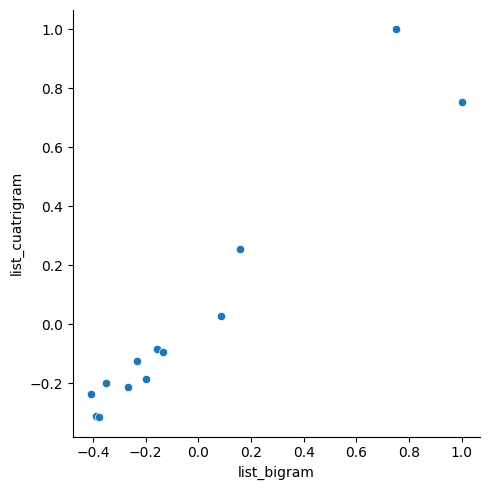

In [15]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_bigram", y="list_cuatrigram")

In [16]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [17]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

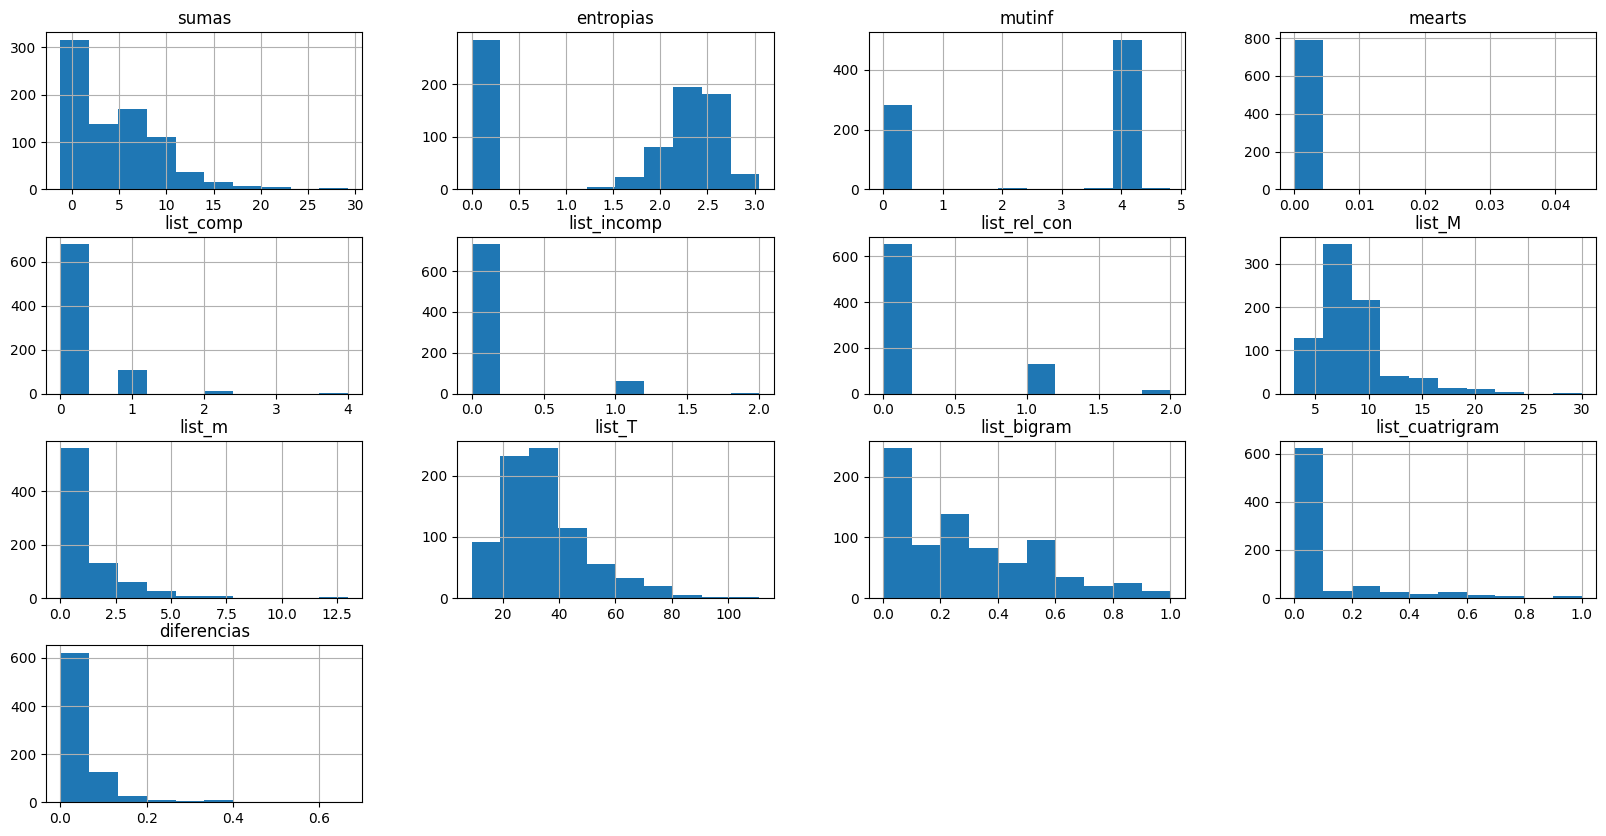

In [18]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [19]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/final/RTE3/TEST_'+str(i+1)+'.csv.pickle')
    else:
        temp = pd.read_pickle('salida/final/RTE3/TEST_'+str(i+1)+'.csv.pickle')
        test=pd.concat([test,temp])

In [20]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,...,list_m,list_T,list_relaciones,listas_malign,listas_malignf,list_bigram,list_trigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000000,2.406,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,36,"director{director,NOUN} - related_to - directe...","le{le,PROPN} beau{be...",Empty DataFrame Columns: [] Index: [claude{cla...,0.166667,0.000000,0.000000,0.000000,YES
1,0.000000,0.000000,2.362,0.000,0.000000,0.000000,0.000000,1.000000,0,1,...,0,36,"become{become,VERB} - manner_of_c - made{make,...","le{le,X} boucher{bou...",Empty DataFrame Columns: [] Index: [claude{cla...,0.500000,0.285714,0.166667,0.000000,YES
2,0.000000,0.000000,0.982,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,19,,"aurore{aurore,NOUN} ...",Empty DataFrame Columns: [] Index: [claude{cla...,0.333333,0.000000,0.000000,0.000000,YES
3,0.000000,0.000000,2.743,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,35,,"michael{michael,PR...","Empty DataFrame Columns: [] Index: [the{the,DE...",0.444444,0.125000,0.000000,0.000000,YES
4,6.383789,138.847382,2.536,2.491,3.915644,0.004324,0.412710,0.347696,0,0,...,1,35,,"michael{michael,PR...","opponent{opponent,...",0.333333,0.000000,0.000000,0.028571,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.532,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,35,,"china{china,P...","Empty DataFrame Columns: [] Index: [it{it,PRON...",0.200000,0.000000,0.000000,0.000000,YES
796,0.000000,0.000000,3.012,0.000,0.000000,0.000000,0.000000,1.000000,0,0,...,0,35,,"us{us,PROPN} exp...","Empty DataFrame Columns: [] Index: [last{last,...",0.400000,0.250000,0.000000,0.000000,NO
797,10.231256,200.796814,2.669,2.398,3.976425,0.002651,0.467463,0.483023,0,0,...,1,42,,"there{there,PRON} ...","there{there,PRON} ...",0.428571,0.333333,0.200000,0.023810,UNKNOWN
798,3.272335,165.737167,2.487,1.841,3.985115,0.003217,0.353093,0.263597,0,0,...,1,23,,"aliens{alien,NOUN} ...","seen{see,VERB} away{...",0.428571,0.166667,0.000000,0.043478,UNKNOWN


In [21]:
test=test.drop(["list_relaciones","listas_malign","listas_malignf"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,similitud_faltantes,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_trigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000000,2.406,0.000,0.000000,0.000000,0.000000,1.000000,0,0,1,7,0,36,0.166667,0.000000,0.000000,0.000000,YES
1,0.000000,0.000000,2.362,0.000,0.000000,0.000000,0.000000,1.000000,0,1,0,9,0,36,0.500000,0.285714,0.166667,0.000000,YES
2,0.000000,0.000000,0.982,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,4,0,19,0.333333,0.000000,0.000000,0.000000,YES
3,0.000000,0.000000,2.743,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,10,0,35,0.444444,0.125000,0.000000,0.000000,YES
4,6.383789,138.847382,2.536,2.491,3.915644,0.004324,0.412710,0.347696,0,0,0,7,1,35,0.333333,0.000000,0.000000,0.028571,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,2.532,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,0.200000,0.000000,0.000000,0.000000,YES
796,0.000000,0.000000,3.012,0.000,0.000000,0.000000,0.000000,1.000000,0,0,0,6,0,35,0.400000,0.250000,0.000000,0.000000,NO
797,10.231256,200.796814,2.669,2.398,3.976425,0.002651,0.467463,0.483023,0,0,0,8,1,42,0.428571,0.333333,0.200000,0.023810,UNKNOWN
798,3.272335,165.737167,2.487,1.841,3.985115,0.003217,0.353093,0.263597,0,0,0,8,1,23,0.428571,0.166667,0.000000,0.043478,UNKNOWN


In [22]:
test=test.drop(["entropia_total","max_info","similitud_faltantes","distancias","list_trigram"],axis=1)
test

,sumas,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000,0.000000,0.000000,0,0,1,7,0,36,0.166667,0.000000,0.000000,YES
1,0.000000,0.000,0.000000,0.000000,0,1,0,9,0,36,0.500000,0.166667,0.000000,YES
2,0.000000,0.000,0.000000,0.000000,0,0,0,4,0,19,0.333333,0.000000,0.000000,YES
3,0.000000,0.000,0.000000,0.000000,0,0,0,10,0,35,0.444444,0.000000,0.000000,YES
4,6.383789,2.491,3.915644,0.004324,0,0,0,7,1,35,0.333333,0.000000,0.028571,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000,0.000000,0.000000,0,0,0,6,0,35,0.200000,0.000000,0.000000,YES
796,0.000000,0.000,0.000000,0.000000,0,0,0,6,0,35,0.400000,0.000000,0.000000,NO
797,10.231256,2.398,3.976425,0.002651,0,0,0,8,1,42,0.428571,0.200000,0.023810,UNKNOWN
798,3.272335,1.841,3.985115,0.003217,0,0,0,8,1,23,0.428571,0.000000,0.043478,UNKNOWN


In [23]:
#test["Shape Origin"] = test["Shape Origin"] / test["Total T"]
#test["Shape Finish"] = test["Shape Finish"] / test["Total T"]

In [24]:
test

,sumas,entropias,mutinf,mearts,list_comp,list_incomp,list_rel_con,list_M,list_m,list_T,list_bigram,list_cuatrigram,diferencias,clases
0,0.000000,0.000,0.000000,0.000000,0,0,1,7,0,36,0.166667,0.000000,0.000000,YES
1,0.000000,0.000,0.000000,0.000000,0,1,0,9,0,36,0.500000,0.166667,0.000000,YES
2,0.000000,0.000,0.000000,0.000000,0,0,0,4,0,19,0.333333,0.000000,0.000000,YES
3,0.000000,0.000,0.000000,0.000000,0,0,0,10,0,35,0.444444,0.000000,0.000000,YES
4,6.383789,2.491,3.915644,0.004324,0,0,0,7,1,35,0.333333,0.000000,0.028571,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000,0.000000,0.000000,0,0,0,6,0,35,0.200000,0.000000,0.000000,YES
796,0.000000,0.000,0.000000,0.000000,0,0,0,6,0,35,0.400000,0.000000,0.000000,NO
797,10.231256,2.398,3.976425,0.002651,0,0,0,8,1,42,0.428571,0.200000,0.023810,UNKNOWN
798,3.272335,1.841,3.985115,0.003217,0,0,0,8,1,23,0.428571,0.000000,0.043478,UNKNOWN


In [25]:
#test=test.drop(["Total T"],axis=1)

In [26]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [27]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [28]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [29]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [30]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [31]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [32]:
X_train.shape

(800, 13)

In [33]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [34]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.decision_function(X)

array([ 4.43323112e-01,  1.00244196e+00,  1.02413669e+00,  1.31408407e+00,
        1.18363647e-01,  8.40593731e-01,  1.14621015e+00,  6.66813980e-01,
        8.95736084e-01, -4.16526162e-01, -2.77518582e-01,  1.04453105e+00,
        3.04041291e-01, -1.06104016e-01,  2.80289472e-01,  6.97489582e-01,
        4.54550164e-01,  1.34238417e-02, -4.81356440e-01,  3.08922003e-01,
        1.25547363e+00, -5.69859177e-01,  1.09560776e+00,  7.93950931e-01,
        4.98454879e-01,  2.95232531e-01,  1.02478314e+00, -2.66056581e-01,
        4.29934215e-01,  8.31060292e-02,  1.32694670e-01,  1.24235129e+00,
       -4.26613329e-01, -4.83996380e-01,  9.26243710e-01, -6.46840468e-01,
       -1.48440660e-01, -1.35254167e-01, -3.29831576e-01,  6.71991640e-01,
        4.00555344e-01, -2.60032548e-01, -2.45567985e-01, -1.52573408e-01,
        4.15125596e-01,  1.06895743e+00, -4.79337531e-01,  3.96780471e-01,
        8.59807812e-01,  1.83980272e-01, -2.93517671e-01,  3.19505385e-02,
       -6.42668741e-01,  

In [36]:
labels=train.columns[:-1]
labels

Index(['sumas', 'entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'list_cuatrigram', 'diferencias'],
      dtype='object')

In [37]:
model.classes_

array([0, 1])

In [38]:
model.coef_[0]

array([ 0.57495194, -0.41856341, -0.58136857, -0.40882324,  0.05214062,
       -0.29618208, -0.35608395,  0.14421121, -2.18896392,  0.40432451,
        1.57659123, -0.62987519, -0.76135376])

In [39]:
coeficientes=model.coef_[0]

In [40]:
coeficientes

array([ 0.57495194, -0.41856341, -0.58136857, -0.40882324,  0.05214062,
       -0.29618208, -0.35608395,  0.14421121, -2.18896392,  0.40432451,
        1.57659123, -0.62987519, -0.76135376])

In [41]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  10 list_bigram 8 list_m


In [42]:
n_columns=train.shape[1]-1

In [43]:
n_columns

13

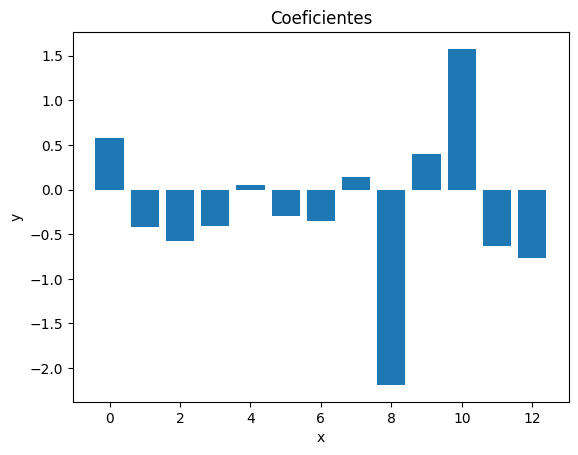

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [45]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [46]:
X_test.shape

(800, 13)

In [47]:
predictions = model.predict(X_test)

In [48]:
print(confusion_matrix(y_test, predictions))

[[220 170]
 [141 269]]


In [49]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.61
precision:  0.61
recall 0.66
f1_score:  0.63
matthews_score:  0.22


In [50]:
X_train.shape

(800, 13)

In [51]:
X_test.shape

(800, 13)

In [52]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [53]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.630000 (0.084880)
Logistic Regression Precision:: 0.650000 (0.095126)
Logistic Regression Recall:: 0.680000 (0.152540)
Logistic Regression F1-score:: 0.650000 (0.100401)


In [174]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.280000 (0.190763)


In [101]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [102]:
#linear_model

In [175]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [176]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       390
           1       0.62      0.61      0.62       410

    accuracy                           0.61       800
   macro avg       0.61      0.61      0.61       800
weighted avg       0.61      0.61      0.61       800



In [177]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [178]:
test.columns[:-1]

Index(['sumas', 'entropias', 'mutinf', 'mearts', 'list_comp', 'list_incomp',
       'list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram',
       'list_cuatrigram', 'diferencias'],
      dtype='object')

In [179]:
explainer.expected_value

-0.027115364480305937

In [180]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.04285714, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.17142857, 0.06060606,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.        ,
        0.        ],
       ...,
       [0.328572  , 0.79168042, 0.81851008, ..., 0.1097561 , 0.05128205,
        0.06349206],
       [0.10508952, 0.60779135, 0.82029887, ..., 0.20454545, 0.        ,
        0.11594203],
       [0.        , 0.        , 0.        , ..., 0.63157895, 0.11764706,
        0.        ]])

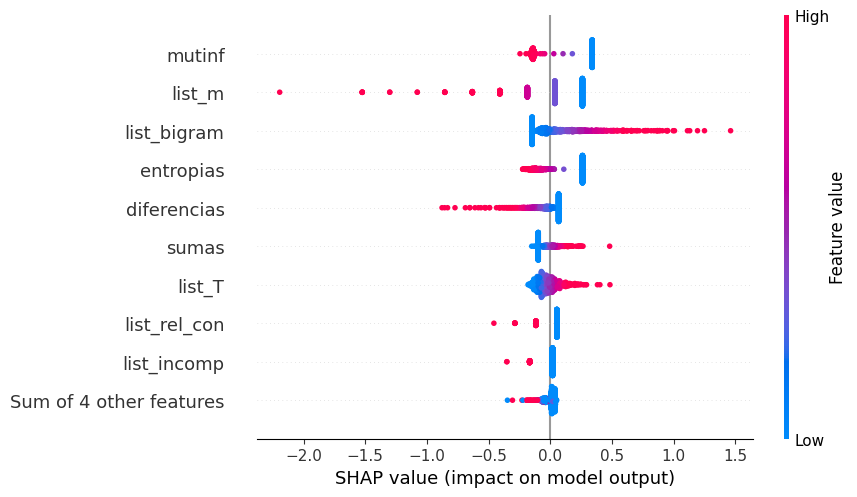

In [181]:
shap.plots.beeswarm(shap_values)

[0.11505195 0.08544109 0.53229329 0.77847474 0.82276753 0.04861899
 0.4109464  0.32388638 0.         0.         0.         0.22222222
 0.09090909 0.3047619  0.0483871  0.         0.         0.08333333] 0 0


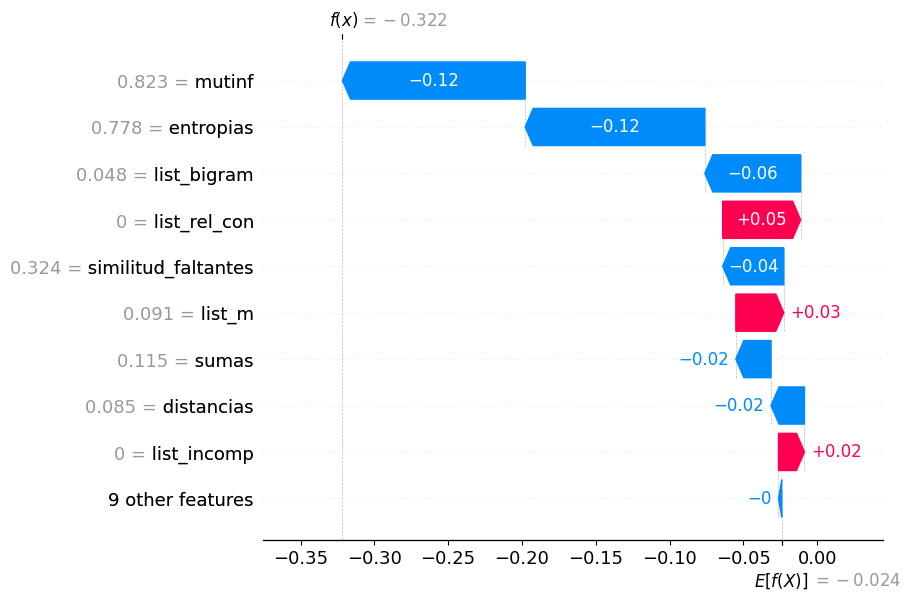

In [78]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [79]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.69859594 0.         0.         0.
 0.         1.         0.         0.         0.         0.25925926
 0.         0.31428571 0.09375    0.05913978 0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

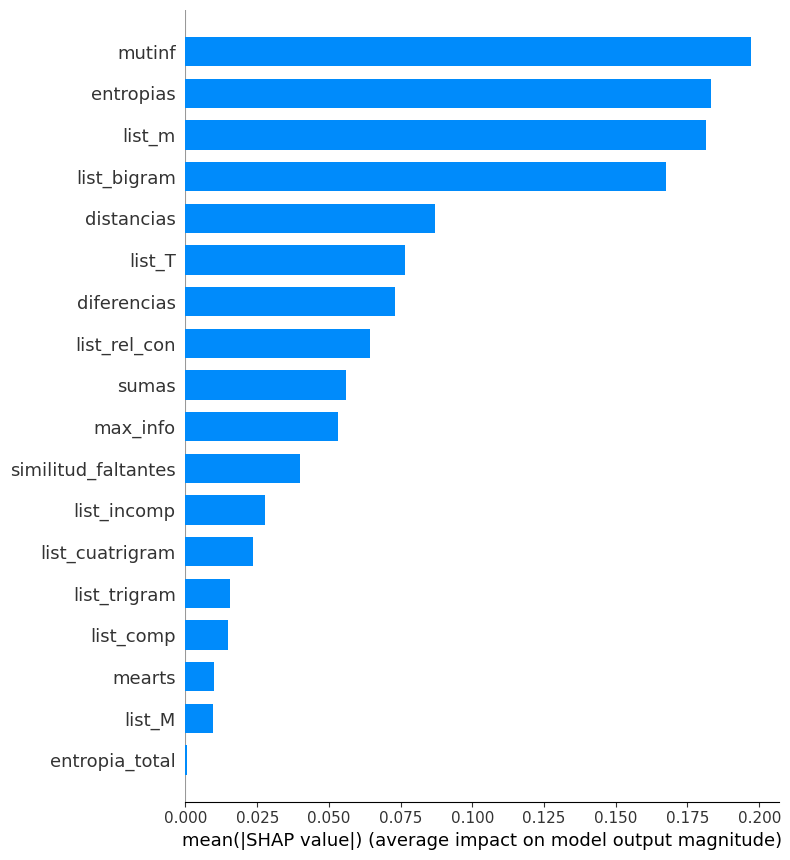

In [80]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

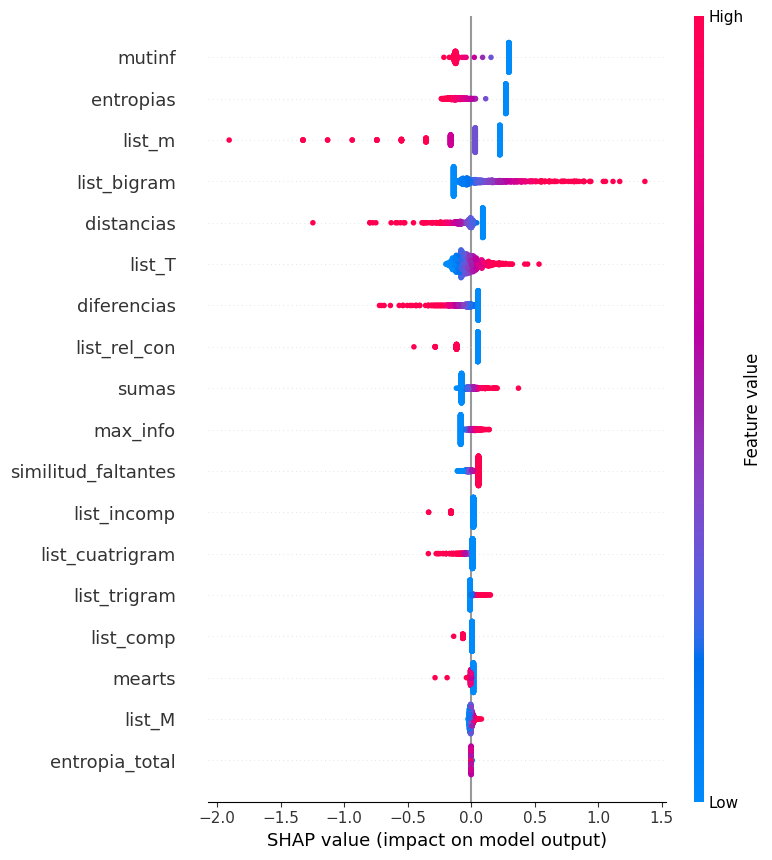

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

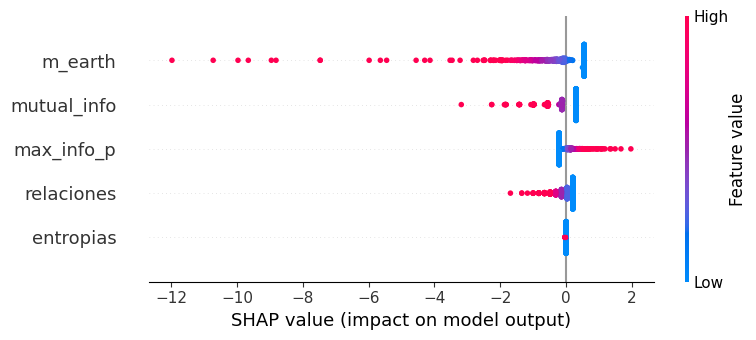

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

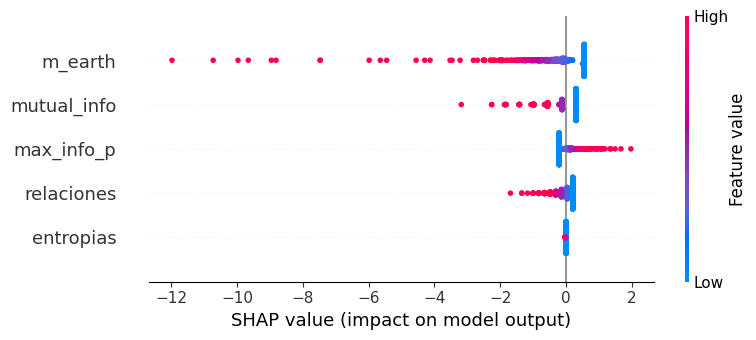

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


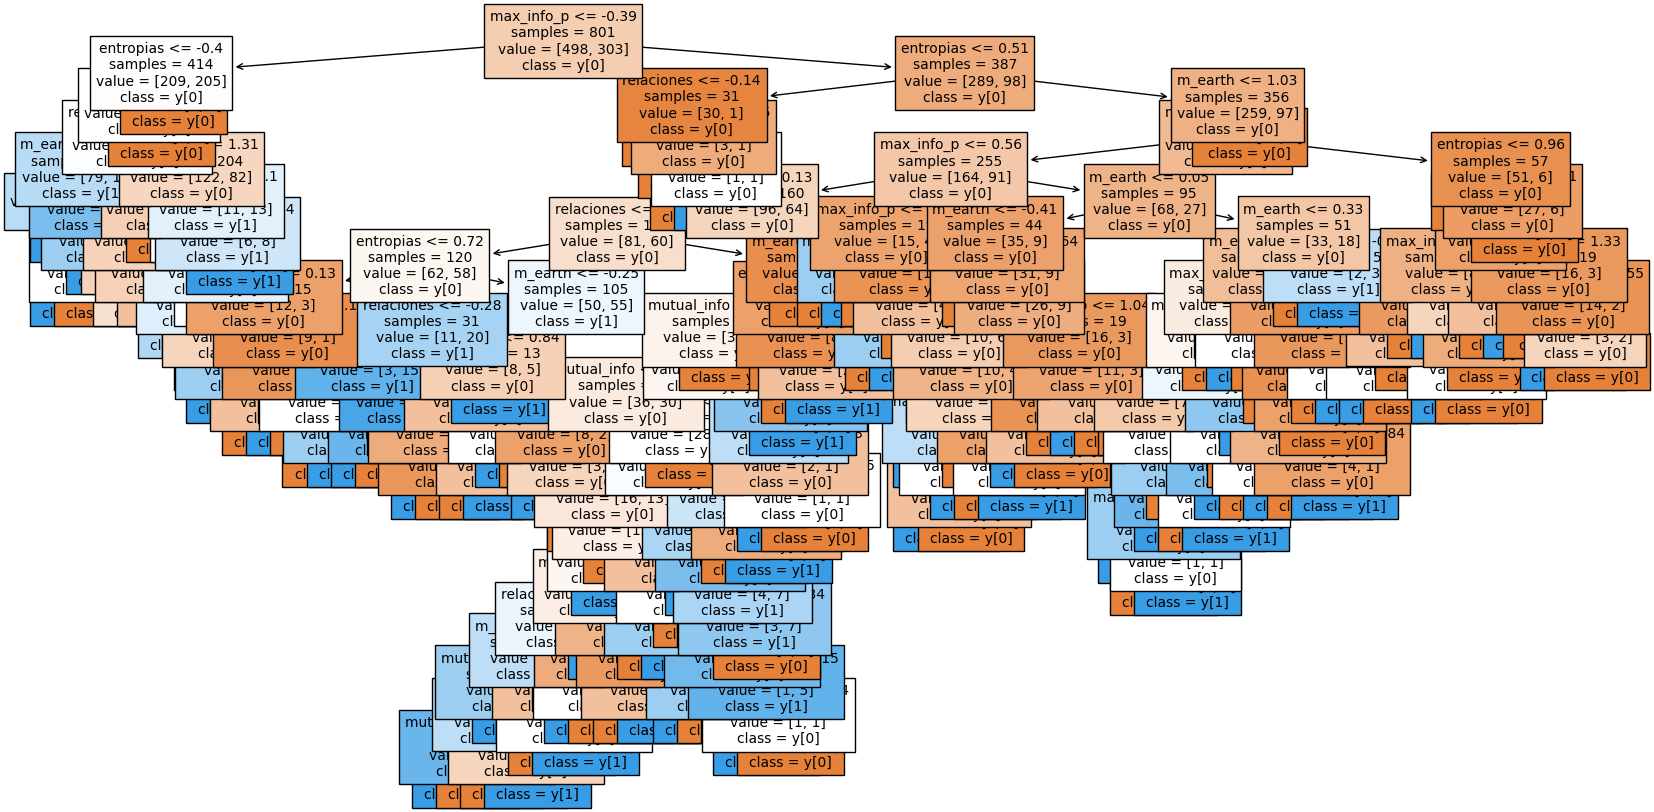

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )